In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from gensim.models.word2vec import Word2Vec

In [25]:
from collections import OrderedDict

models = OrderedDict([
    (year, Word2Vec.load('/Users/dclure/Projects/hist-vec/corpora/LemCorpAcad_models/{}.bin'.format(year)))
    for year in range(1820, 1940, 20)
])

In [5]:
def cosine_series(anchor, query):
    
    series = OrderedDict()
    
    for year, model in models.items():
        
        series[year] = (
            model.similarity(anchor, query)
            if query in model else 0
        )

    return series

In [6]:
import numpy as np
import statsmodels.api as sm

def lin_reg(series):

    x = np.array(list(series.keys()))
    y = np.array(list(series.values()))

    x = sm.add_constant(x)

    return sm.OLS(y, x).fit()

In [7]:
def plot_cosine_series(anchor, query, w=5, h=4):
    
    series = cosine_series(anchor, query)
    
    fit = lin_reg(series)

    x1 = list(series.keys())[0]
    x2 = list(series.keys())[-1]

    y1 = fit.predict()[0]
    y2 = fit.predict()[-1]
    
    print(query)
    
    plt.figure(figsize=(w, h))
    plt.ylim(0, 1)
    plt.title(query)
    plt.xlabel('Year')
    plt.ylabel('Similarity')
    plt.plot(list(series.keys()), list(series.values()))
    plt.plot([x1, x2], [y1, y2], color='gray', linewidth=0.5)
    plt.show()

poésie


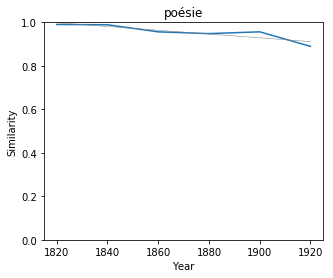

In [9]:
plot_cosine_series('littérature', 'poésie')

In [10]:
def union_neighbor_vocab(anchor, topn=200):
    
    vocab = set()
    
    for year, model in models.items():
        similar = model.most_similar(anchor, topn=topn)
        vocab.update([s[0] for s in similar])
        
    return vocab

In [11]:
union_vocab = union_neighbor_vocab('littérature')

In [12]:
data = []
for token in union_vocab:
    
    series = cosine_series('littérature', token)
    fit = lin_reg(series)
    
    data.append((token, fit.params[1], fit.pvalues[1]))

In [13]:
import pandas as pd

df1 = pd.DataFrame(data, columns=('token', 'slope', 'p'))

# Increasing

In [14]:
pd.set_option('display.max_rows', 1000)

df1.sort_values('slope', ascending=False).head(50)

,token,slope,p
540,relèvement,0.011273,0.029289
125,personnalité,0.011213,0.018735
608,dégoût,0.011129,0.025205
365,péché,0.011068,0.013999
430,lorrain,0.011040,0.017131
496,diplomatie,0.010961,0.040746
730,besogne,0.010934,0.016889
366,maîtrise,0.010898,0.030916
777,romantisme,0.010843,0.032274
652,artisan,0.010827,0.033179


relèvement


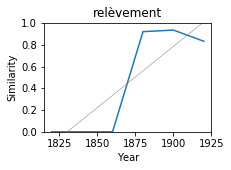

personnalité


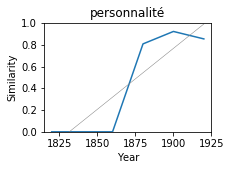

dégoût


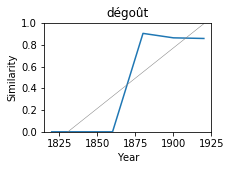

péché


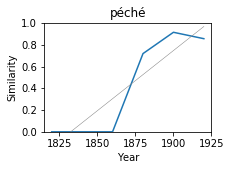

lorrain


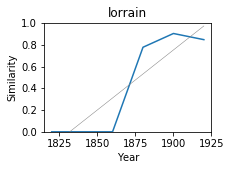

diplomatie


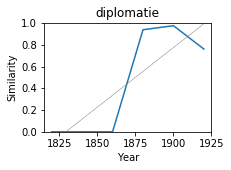

besogne


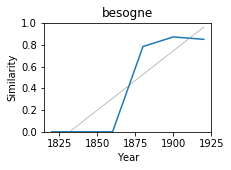

maîtrise


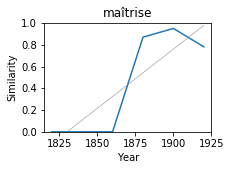

romantisme


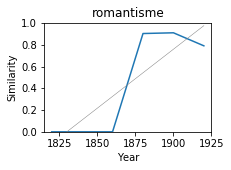

artisan


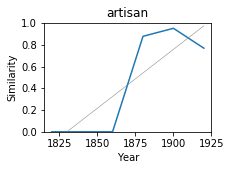

boulevard


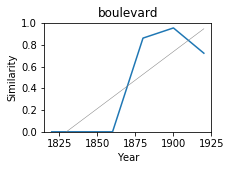

métier


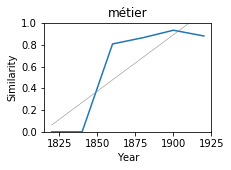

solidarité


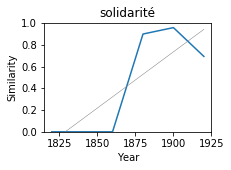

exaltation


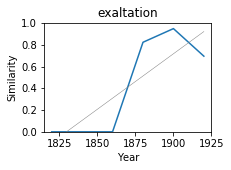

légende


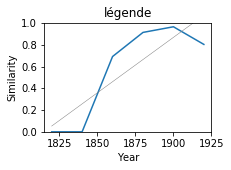

chair


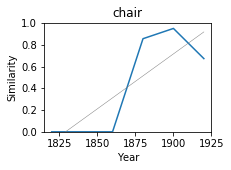

cerveau


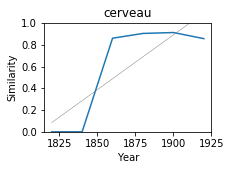

faillite


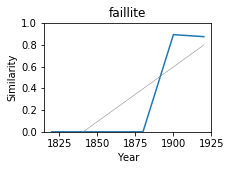

enchanteur


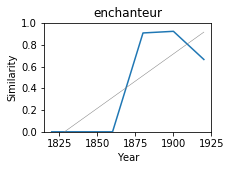

signification


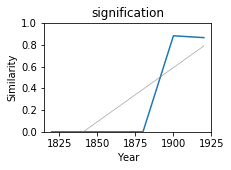

In [15]:
for i, row in df1.sort_values('slope', ascending=False).head(20).iterrows():
    plot_cosine_series('littérature', row['token'], 3, 2)

# Decreasing

In [16]:
df1.sort_values('slope', ascending=True).head(50)

,token,slope,p
351,chantre,-0.012226,0.015793
20,renommé,-0.012069,0.019594
414,proscription,-0.011094,0.039579
575,urbanité,-0.010996,0.039086
189,déplorable,-0.010669,0.036140
124,faction,-0.010013,0.096064
283,trois,-0.009009,0.007549
679,pompe,-0.008553,0.137751
328,esclavage,-0.008161,0.178446
523,dernier,-0.007497,0.015167


chantre


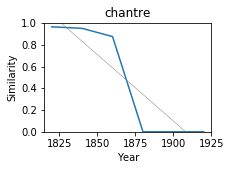

renommé


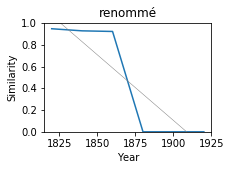

proscription


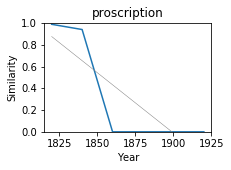

urbanité


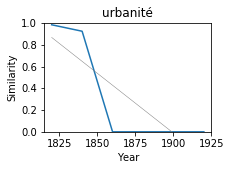

déplorable


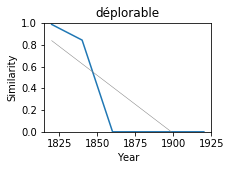

faction


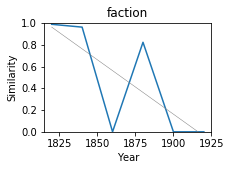

trois


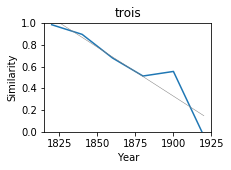

pompe


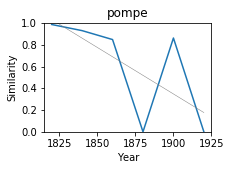

esclavage


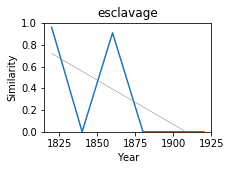

dernier


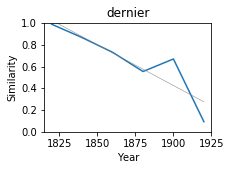

charte


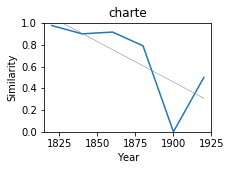

dévouer


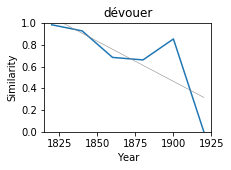

législation


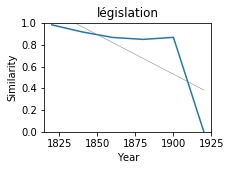

tyrannie


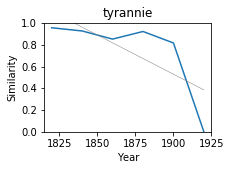

arioste


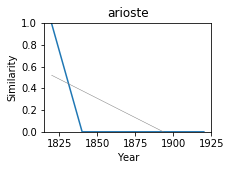

prospérité


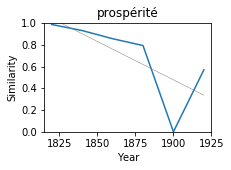

jouissance


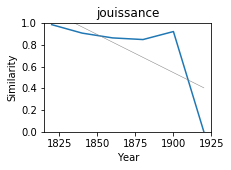

débris


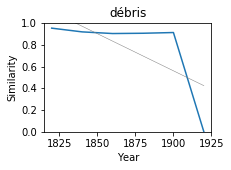

joug


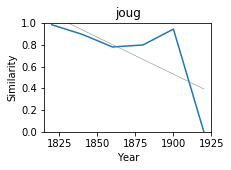

expédition


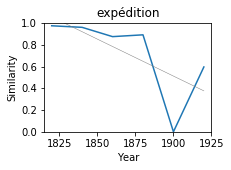

In [17]:
for i, row in df1.sort_values('slope', ascending=True).head(20).iterrows():
    plot_cosine_series('littérature', row['token'], 3, 2)

In [18]:
def intersect_neighbor_vocab(anchor, topn=2000):
    
    vocabs = []
    
    for year, model in models.items():
        similar = model.most_similar(anchor, topn=topn)
        vocabs.append(set([s[0] for s in similar]))
        
    return set.intersection(*vocabs)

In [19]:
intersect_vocab = intersect_neighbor_vocab('littérature')

In [20]:
data = []
for token in intersect_vocab:
    
    series = cosine_series('littérature', token)
    fit = lin_reg(series)
    
    if fit.pvalues[1] < 0.05:
        data.append((token, fit.params[1], fit.pvalues[1]))

In [21]:
import pandas as pd

df2 = pd.DataFrame(data, columns=('token', 'slope', 'p'))

# Intersected neighbors

In [22]:
df2.sort_values('slope', ascending=False)

,token,slope,p
25,poésie,-0.000868,0.018344
11,genre,-0.000906,0.009680
33,beauté,-0.000934,0.039823
34,lettre,-0.000947,0.017506
19,procédé,-0.001171,0.034897
14,curiosité,-0.001176,0.041173
24,existence,-0.001185,0.040293
32,nation,-0.001205,0.029201
10,jeu,-0.001316,0.017110
4,instinct,-0.001479,0.045427


poésie


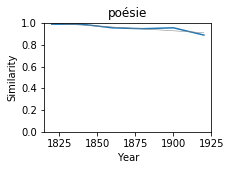

genre


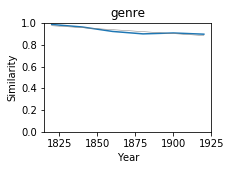

beauté


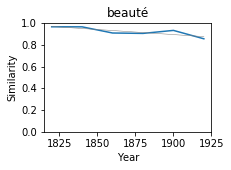

lettre


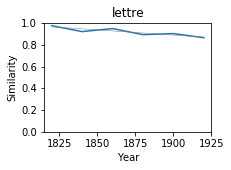

procédé


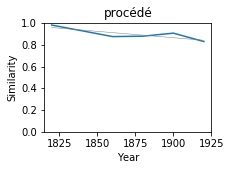

curiosité


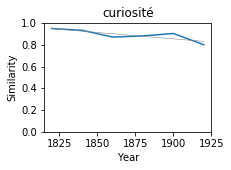

existence


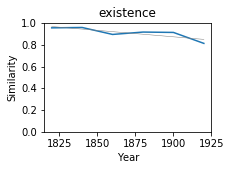

nation


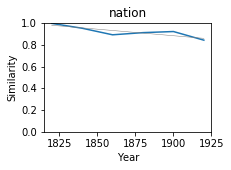

jeu


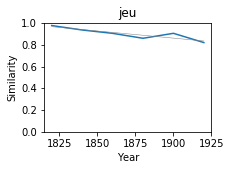

instinct


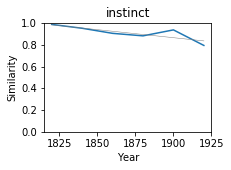

intelligence


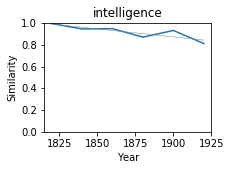

développer


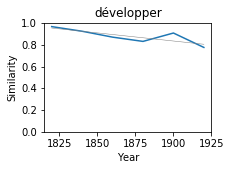

instrument


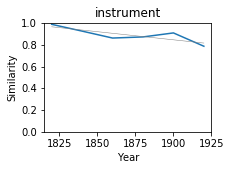

forme


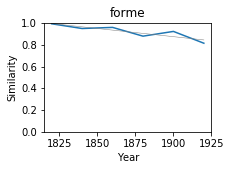

sein


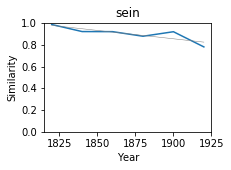

action


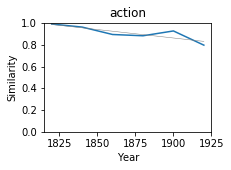

style


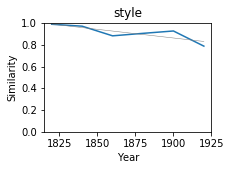

amener


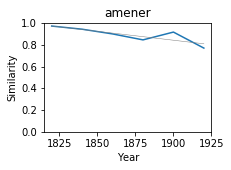

spectacle


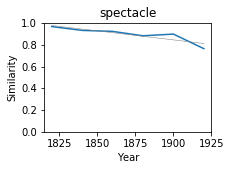

pureté


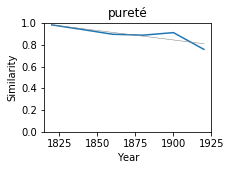

merveilleux


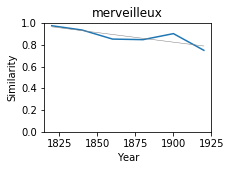

commerce


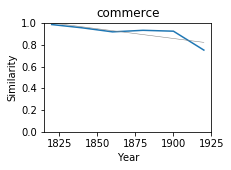

unir


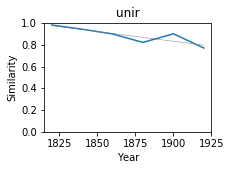

église


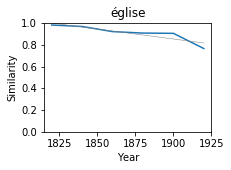

caprice


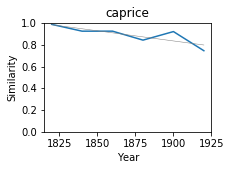

sanctuaire


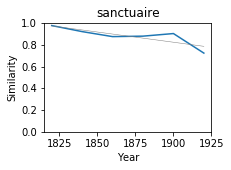

éclat


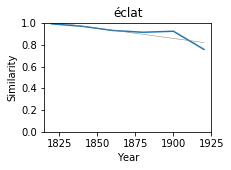

foyer


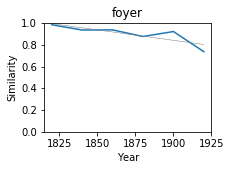

intrigue


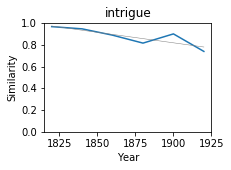

remarquable


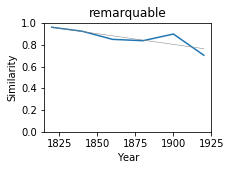

nouvelle


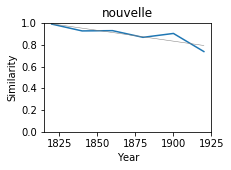

puissant


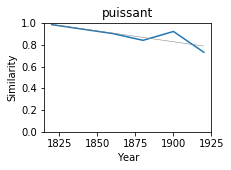

paix


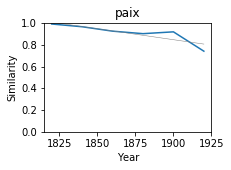

puissance


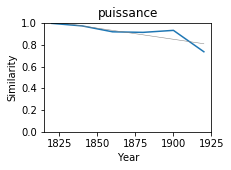

rapport


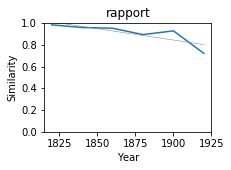

scène


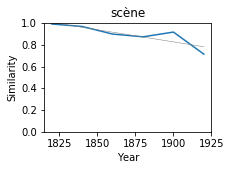

In [23]:
for i, row in df2.sort_values('slope', ascending=False).iterrows():
    plot_cosine_series('littérature', row['token'], 3, 2)